#This notebook contains processing steps, pca, correlation, mlp, plots and analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.pyplot import figure
import seaborn as sns
import time
import os
import kagglehub as kh
from scipy.io import arff

In [ ]:
path= kh.dataset_download("jacobvs/ddos-attack-network-logs")

100%|██████████| 90.3M/90.3M [00:03<00:00, 24.4MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jacobvs/ddos-attack-network-logs/versions/1


In [ ]:
!ls '/root/.cache/kagglehub/datasets/jacobvs/ddos-attack-network-logs/versions/1'

final-dataset.arff  final-dataset-short.arff


In [ ]:
# DON'T RUN
data, meta = arff.loadarff(path + '/final-dataset-short.arff')
data = pd.DataFrame(data)
data

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.000000,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.000000,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.000000,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.000000,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.000000,16.029803,16.059813,1.030054,50.061864,b'Normal'
5,24.10,1.00,219350.0,21.0,1.0,b'ack',55.0,b'-------',2.0,6837.0,...,328.297902,18056.4,55.0,0.008440,0.000000,21.865762,21.895771,1.030016,50.043427,b'Normal'
6,24.13,13.00,480053.0,24.0,23.0,b'ack',55.0,b'-------',14.0,13609.0,...,328.460278,18065.3,55.0,0.008446,0.000000,42.450320,42.480330,1.030032,50.055747,b'Normal'
7,2.10,24.22,599411.0,23.0,24.0,b'cbr',1000.0,b'-------',23.0,4156.0,...,124.943625,124944.0,1000.0,0.059605,0.000320,58.248000,58.278560,25.000000,75.022560,b'Normal'
8,24.20,2.00,551227.0,24.0,23.0,b'ack',55.0,b'-------',3.0,15392.0,...,328.264120,18054.5,55.0,0.008440,0.000000,47.910078,47.940088,1.030022,50.048477,b'Normal'
9,2.00,24.20,399941.0,21.0,23.0,b'tcp',1540.0,b'-------',3.0,11595.0,...,328.264040,505526.0,1540.0,0.236321,0.001724,36.304803,36.336896,1.000000,50.018467,b'Normal'


In [ ]:
data, meta = arff.loadarff(path + '/final-dataset.arff')
df = pd.DataFrame(data)
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184.0,22.0,10.0,b'ack',55.0,b'-------',11.0,1343.0,...,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1.030013,50.040562,b'Normal'
2160664,24.12,12.00,376386.0,23.0,22.0,b'ack',55.0,b'-------',13.0,10991.0,...,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1.030026,50.051067,b'Normal'
2160665,1.00,24.10,140121.0,21.0,23.0,b'tcp',1540.0,b'-------',2.0,4374.0,...,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1.000000,50.013418,b'Normal'
2160666,5.00,24.50,26800.0,5.0,21.0,b'tcp',1540.0,b'-------',6.0,832.0,...,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1.000000,50.027339,b'Normal'


In [ ]:
print(df.columns)

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')


In [ ]:
# dropping unnecessary columns
df['FLOW_DURATION'] = df['LAST_PKT_RESEVED'] - df['FIRST_PKT_SENT']
df.drop(columns=['LAST_PKT_RESEVED', 'FIRST_PKT_SENT'], inplace=True)

df.drop(columns=['SEQ_NUMBER', 'FID','PKT_ID', 'SRC_ADD','DES_ADD', 'NODE_NAME_FROM','NODE_NAME_TO'], inplace=True)
print(df.columns)
df

Index(['FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'FLAGS',
       'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R',
       'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION'],
      dtype='object')


,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION
0,21.0,23.0,b'tcp',1540.0,b'-------',16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,b'Normal',49.021920
1,23.0,24.0,b'tcp',1540.0,b'-------',16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,b'Normal',49.030211
2,23.0,22.0,b'ack',55.0,b'-------',16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,b'UDP-Flood',49.030176
3,23.0,21.0,b'ack',55.0,b'-------',16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,b'Normal',49.030040
4,23.0,21.0,b'ack',55.0,b'-------',16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,b'Normal',49.031810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,b'ack',55.0,b'-------',16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,b'Normal',49.010549
2160664,23.0,22.0,b'ack',55.0,b'-------',16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,b'Normal',49.021041
2160665,21.0,23.0,b'tcp',1540.0,b'-------',16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,b'Normal',49.013418
2160666,5.0,21.0,b'tcp',1540.0,b'-------',16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,b'Normal',49.027339


In [ ]:
#decode bytes sequences in strings
df1 = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
df['PKT_TYPE'] = df['PKT_TYPE'].str.decode('utf-8')
df['FLAGS'] = df['FLAGS'].str.decode('utf-8')
df['PKT_CLASS'] = df['PKT_CLASS'].str.decode('utf-8')

<ipython-input-8-0c36eefeb871>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


In [ ]:
df

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION
0,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920
1,23.0,24.0,tcp,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211
2,23.0,22.0,ack,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176
3,23.0,21.0,ack,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040
4,23.0,21.0,ack,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,ack,55.0,-------,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,Normal,49.010549
2160664,23.0,22.0,ack,55.0,-------,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,Normal,49.021041
2160665,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,Normal,49.013418
2160666,5.0,21.0,tcp,1540.0,-------,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,Normal,49.027339


In [ ]:
#checking if both above approaches result in same operations
df.equals(df1)

True

In [ ]:
df1

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION
0,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920
1,23.0,24.0,tcp,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211
2,23.0,22.0,ack,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176
3,23.0,21.0,ack,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040
4,23.0,21.0,ack,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,ack,55.0,-------,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,Normal,49.010549
2160664,23.0,22.0,ack,55.0,-------,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,Normal,49.021041
2160665,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,Normal,49.013418
2160666,5.0,21.0,tcp,1540.0,-------,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,Normal,49.027339


In [ ]:
#if not, then we want to find out which columns were missed
if not df.equals(df1):
  print(df.columns[df.ne(df1).any()])

In [ ]:
flag_mapping = ['U', 'A', 'P', 'R', 'S', 'F', 'X']
for i, flag in enumerate(flag_mapping):
    df[f'FLAG_{flag}'] = df['FLAGS'].apply(lambda x: 1 if x[i] != '-' else 0)

# since only normal values and R flags are present and no other flags are present hence we drop other flags
df.drop(columns=['FLAGS','FLAG_U', 'FLAG_A','FLAG_P', 'FLAG_S','FLAG_F', 'FLAG_X'], inplace=True)

print(df.columns)
df

Index(['FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'PKT_CLASS', 'FLOW_DURATION',
       'FLAG_R'],
      dtype='object')


,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,tcp,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920,0
1,23.0,24.0,tcp,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211,0
2,23.0,22.0,ack,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176,0
3,23.0,21.0,ack,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040,0
4,23.0,21.0,ack,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,ack,55.0,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,Normal,49.010549,0
2160664,23.0,22.0,ack,55.0,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,Normal,49.021041,0
2160665,21.0,23.0,tcp,1540.0,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,Normal,49.013418,0
2160666,5.0,21.0,tcp,1540.0,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,Normal,49.027339,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# identify your categorical columns
cat_cols = ['PKT_TYPE', 'PKT_CLASS']  # add more if needed
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df1[col+'_enc'] = le.fit_transform(df1[col])
    label_encoders[col] = {
        'classes': le.classes_.tolist(),      # original labels
        'mapping': {c: i for i, c in enumerate(le.classes_)}
    }

# now drop the originals if you like
df1.drop(columns=cat_cols, inplace=True)
df1

,FROM_NODE,TO_NODE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FLOW_DURATION,PKT_TYPE_enc,PKT_CLASS_enc
0,21.0,23.0,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,49.021920,3,1
1,23.0,24.0,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,49.030211,3,1
2,23.0,22.0,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,49.030176,0,4
3,23.0,21.0,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,49.030040,0,1
4,23.0,21.0,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,49.031810,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,55.0,-------,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,49.010549,0,1
2160664,23.0,22.0,55.0,-------,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,49.021041,0,1
2160665,21.0,23.0,1540.0,-------,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,49.013418,3,1
2160666,5.0,21.0,1540.0,-------,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,49.027339,3,1


In [ ]:
print(label_encoders['PKT_TYPE'])

{'classes': ['ack', 'cbr', 'ping', 'tcp'], 'mapping': {'ack': 0, 'cbr': 1, 'ping': 2, 'tcp': 3}}


In [ ]:
print(label_encoders['PKT_CLASS'])

{'classes': ['HTTP-FLOOD', 'Normal', 'SIDDOS', 'Smurf', 'UDP-Flood'], 'mapping': {'HTTP-FLOOD': 0, 'Normal': 1, 'SIDDOS': 2, 'Smurf': 3, 'UDP-Flood': 4}}


In [ ]:
label_encoders

{'PKT_TYPE': {'classes': ['ack', 'cbr', 'ping', 'tcp'],
  'mapping': {'ack': 0, 'cbr': 1, 'ping': 2, 'tcp': 3}},
 'PKT_CLASS': {'classes': ['HTTP-FLOOD',
   'Normal',
   'SIDDOS',
   'Smurf',
   'UDP-Flood'],
  'mapping': {'HTTP-FLOOD': 0,
   'Normal': 1,
   'SIDDOS': 2,
   'Smurf': 3,
   'UDP-Flood': 4}}}

In [ ]:
'''
# 1) Encode your target (PKT_CLASS) into integers 0…4
le_target = LabelEncoder()
df['class_enc'] = le_target.fit_transform(df['PKT_CLASS'])

# map the class labels to integers
class_mapping = {cls:idx for idx, cls in enumerate(df['PKT_CLASS'].unique())}
df['class_enc'] = df['PKT_CLASS'].map(class_mapping)
'''

# compute Pearson correlations
corr_with_class = df.select_dtypes(include=np.number) \
                    .corr()['PKT_CLASS_enc'] \
                    .abs() \
                    .sort_values(ascending=False)

print(corr_with_class)

PKT_CLASS_enc       1.000000
PKT_RATE            0.841112
FLOW_DURATION       0.822833
BYTE_RATE           0.749745
PKT_DELAY           0.489222
NUMBER_OF_PKT       0.300938
PKT_RESEVED_TIME    0.110688
PKT_OUT             0.110629
PKT_R               0.110624
PKT_IN              0.110599
PKT_SEND_TIME       0.110588
TO_NODE             0.108558
PKT_AVG_SIZE        0.087086
PKT_SIZE            0.087086
PKT_TYPE_enc        0.079853
FROM_NODE           0.071915
PKT_DELAY_NODE      0.061408
UTILIZATION         0.026272
NUMBER_OF_BYTE      0.026272
FLAG_R              0.005459
Name: PKT_CLASS_enc, dtype: float64


In [ ]:
top_ffff

['PKT_RATE',
 'FLOW_DURATION',
 'BYTE_RATE',
 'PKT_DELAY',
 'NUMBER_OF_PKT',
 'PKT_RESEVED_TIME',
 'PKT_OUT',
 'PKT_R',
 'PKT_IN',
 'PKT_SEND_TIME',
 'TO_NODE',
 'PKT_AVG_SIZE',
 'PKT_SIZE',
 'PKT_TYPE_enc',
 'FROM_NODE',
 'PKT_DELAY_NODE',
 'UTILIZATION',
 'NUMBER_OF_BYTE',
 'FLAG_R']

In [ ]:
# pick your top-k features
top_ffff = corr_with_class.drop('PKT_CLASS_enc').index.tolist()
X1 = df[top_ffff]
X1

,PKT_RATE,FLOW_DURATION,BYTE_RATE,PKT_DELAY,NUMBER_OF_PKT,PKT_RESEVED_TIME,PKT_OUT,PKT_R,PKT_IN,PKT_SEND_TIME,TO_NODE,PKT_AVG_SIZE,PKT_SIZE,PKT_TYPE_enc,FROM_NODE,PKT_DELAY_NODE,UTILIZATION,NUMBER_OF_BYTE,FLAG_R
0,328.240918,49.021920,505490.0,0.0,16091.0,35.550032,35.529786,35.539909,35.529786,35.519662,23.0,1540.0,1540.0,3,21.0,0.0,0.236321,24780100.0,0
1,328.205808,49.030211,505437.0,0.0,16092.0,20.186848,20.176725,20.186848,20.176725,20.156478,24.0,1540.0,1540.0,3,23.0,0.0,0.236337,24781700.0,0
2,328.206042,49.030176,18051.3,0.0,16092.0,7.069962,7.049955,7.059958,7.049955,7.039952,22.0,55.0,55.0,0,23.0,0.0,0.008441,885060.0,0
3,328.064183,49.030040,18043.5,0.0,16085.0,39.647976,39.627970,39.637973,39.627970,39.617967,21.0,55.0,55.0,0,23.0,0.0,0.008437,884675.0,0
4,328.113525,49.031810,18046.2,0.0,16088.0,16.059813,16.039806,16.049810,16.039806,16.029803,21.0,55.0,55.0,0,23.0,0.0,0.008438,884840.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,328.561918,49.010549,18070.9,0.0,16103.0,5.305043,5.295040,5.305043,5.295040,5.275034,10.0,55.0,55.0,0,22.0,0.0,0.008446,885665.0,0
2160664,328.491596,49.021041,18067.0,0.0,16103.0,34.528655,34.508649,34.518652,34.508649,34.498646,22.0,55.0,55.0,0,23.0,0.0,0.008446,885665.0,0
2160665,328.297855,49.013418,505578.0,0.0,16091.0,14.438258,14.418011,14.428134,14.418011,14.407888,23.0,1540.0,1540.0,3,21.0,0.0,0.236321,24780100.0,0
2160666,328.204637,49.027339,505434.0,0.0,16091.0,3.762597,3.732227,3.742350,3.732227,3.732227,21.0,1540.0,1540.0,3,5.0,0.0,0.236321,24780100.0,0


Explained variance ratio per component:
  PC1: 0.3593
  PC2: 0.3021
  PC3: 0.1895
  PC4: 0.0760
  PC5: 0.0468
  PC6: 0.0226
  PC7: 0.0037
  PC8: 0.0000
  PC9: 0.0000
  PC10: 0.0000


,Principal Component,Explained Variance Ratio
0,PC1,3.592638e-01
1,PC2,3.021267e-01
2,PC3,1.895354e-01
3,PC4,7.602441e-02
4,PC5,4.676843e-02
5,PC6,2.262128e-02
6,PC7,3.659959e-03
7,PC8,1.978556e-08
8,PC9,7.185584e-10
9,PC10,1.347554e-11



PCA Loadings (feature weights for each PC):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
FLOW_DURATION,-0.293472,-0.406221,0.210206,0.026079,0.239638,0.549419,0.587115,-0.000175,0.000031,-3.973122e-06
BYTE_RATE,0.254660,0.408499,-0.127829,0.328363,-0.207047,0.754185,-0.180141,-0.000007,-0.000014,-8.014522e-07
PKT_RATE,0.168704,0.426658,-0.378133,0.229749,0.067341,-0.261302,0.721747,-0.000092,-0.000019,-9.396978e-07
PKT_DELAY,0.304892,0.253646,-0.043312,-0.536486,0.720717,0.164454,-0.080830,-0.000184,0.000125,-3.507055e-06
PKT_SIZE,0.189617,0.196413,0.623511,0.139057,0.023596,-0.098727,0.084026,-0.000307,-0.001226,7.071059e-01
PKT_AVG_SIZE,0.189617,0.196413,0.623511,0.139060,0.023591,-0.098732,0.084022,0.000246,0.001215,-7.071055e-01
NUMBER_OF_PKT,-0.371703,0.076194,-0.054474,0.638030,0.594726,-0.107388,-0.284167,0.000039,0.000002,4.859264e-07
PKT_RESEVED_TIME,0.415372,-0.336013,-0.068560,0.187129,0.083646,-0.031496,-0.013048,0.816260,-0.020101,2.844069e-04
PKT_R,0.415337,-0.336054,-0.068601,0.187191,0.083521,-0.031606,-0.013262,-0.425516,-0.696850,-1.369149e-03
PKT_OUT,0.415321,-0.336066,-0.068606,0.187300,0.083387,-0.031650,-0.013250,-0.390711,0.716933,1.084662e-03



Cumulative explained variance:


,PC,Cumulative Explained Variance
0,PC1,0.359264
1,PC2,0.661391
2,PC3,0.850926
3,PC4,0.926950
4,PC5,0.973719
5,PC6,0.996340
6,PC7,1.000000
7,PC8,1.000000
8,PC9,1.000000
9,PC10,1.000000


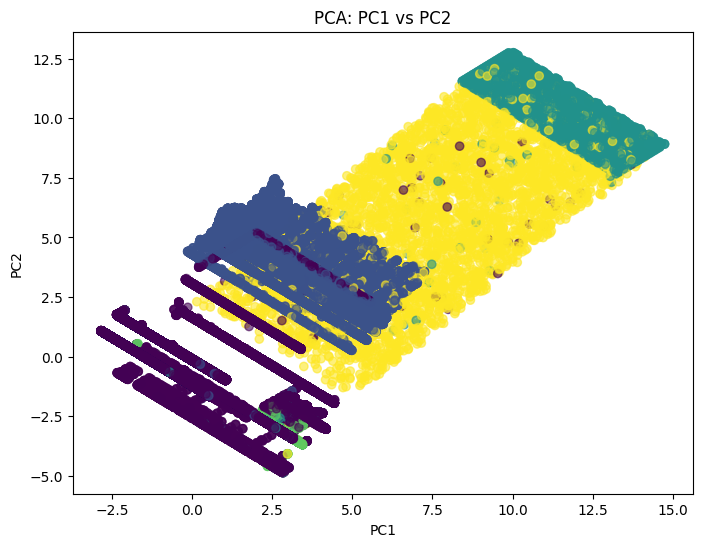

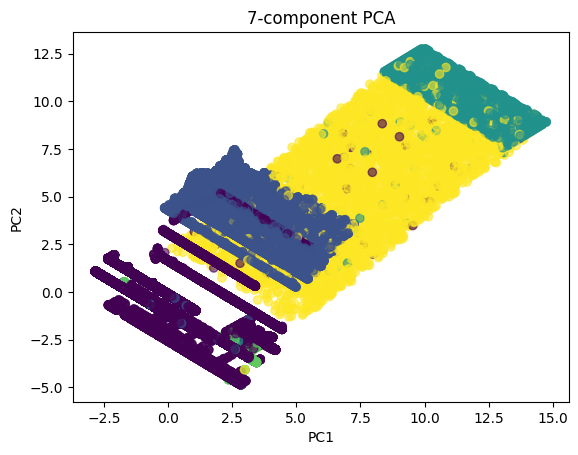

In [ ]:
'''
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# pick your top-k features
top_feats = corr_with_class.drop('class_enc').head(10).index.tolist()
X = df[top_feats]

# scale & run PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#######################################################
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# — assume you have:
# top_feats = list of your selected features
# df = your full DataFrame
# class_enc = your target encoding (only for color in plot)
# X_scaled = scaler.fit_transform(df[top_feats])

# 1) Fit PCA
pca = PCA(n_components= len(top_feats))  # or however many PCs you want
X_pca = pca.fit_transform(X_scaled)

# 2) Explained‐variance ratios
print("Explained variance ratio per component:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f}")

# Tabulate it
var_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, len(pca.explained_variance_ratio_)+1)],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
display(var_df)

# 3) Component loadings (feature contributions)
loadings = pd.DataFrame(
    pca.components_.T,
    index=top_feats,
    columns=[f'PC{i}' for i in range(1, pca.n_components_+1)]
)
print("\nPCA Loadings (feature weights for each PC):")
display(loadings)

# 4) (Optional) cumulative explained variance
cum_var = pca.explained_variance_ratio_.cumsum()
cum_df = pd.DataFrame({
    'PC': var_df['Principal Component'],
    'Cumulative Explained Variance': cum_var
})
print("\nCumulative explained variance:")
display(cum_df)

# 5) (Optional) 2D scatter with color
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['class_enc'], alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.show()
########################################################



pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# visualize
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['class_enc'], alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('7-component PCA')
plt.show()
'''

In [ ]:
# Compute corr with target; select features with |corr|>threshold
high_corr = corr_with_class.drop('PKT_CLASS_enc')
keep_feats = high_corr[high_corr > 0.1].index.tolist()
high_corr

,PKT_CLASS_enc
PKT_RATE,0.841112
FLOW_DURATION,0.822833
BYTE_RATE,0.749745
PKT_DELAY,0.489222
NUMBER_OF_PKT,0.300938
PKT_RESEVED_TIME,0.110688
PKT_OUT,0.110629
PKT_R,0.110624
PKT_IN,0.110599
PKT_SEND_TIME,0.110588


In [ ]:
keep_feats

['PKT_RATE',
 'FLOW_DURATION',
 'BYTE_RATE',
 'PKT_DELAY',
 'NUMBER_OF_PKT',
 'PKT_RESEVED_TIME',
 'PKT_OUT',
 'PKT_R',
 'PKT_IN',
 'PKT_SEND_TIME',
 'TO_NODE']

In [ ]:
# Scale & run PCA on those
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_sub = df[keep_feats]
X_scaled = StandardScaler().fit_transform(X_sub)
pca = PCA(n_components=0.90)   # keep 90% variance
X_pca = pca.fit_transform(X_scaled)

# 3) Train & compare:
#    a) model on raw keep_feats
#    b) model on X_pca
# pick whichever yields the best cross-val accuracy.

In [ ]:
# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras

# ─────────────────────────────────────────────────────────────────────────────
# 2) Assume you already have:
#    df           = your DataFrame
#    keep_feats   = list of columns with |corr| > threshold
#    df['PKT_CLASS_enc'] = 0…4 integer labels
# ─────────────────────────────────────────────────────────────────────────────

# 3) Scale & PCA on all kept features
X_sub     = df[keep_feats].values
y         = df['PKT_CLASS_enc'].values
scaler    = StandardScaler()
X_scaled  = scaler.fit_transform(X_sub)

# “full” PCA to inspect
pca_full  = PCA(n_components=len(keep_feats))
X_pca_full = pca_full.fit_transform(X_scaled)

# 4) Explained-variance ratios
var_ratio = pca_full.explained_variance_ratio_
evr_df    = pd.DataFrame({
    'PC': [f'PC{i}' for i in range(1, len(var_ratio)+1)],
    'Explained Variance Ratio': var_ratio,
    'Cumulative VAR': np.cumsum(var_ratio)
})
display(evr_df)

,PC,Explained Variance Ratio,Cumulative VAR
0,PC1,4.902917e-01,0.490292
1,PC2,2.750249e-01,0.765317
2,PC3,9.245056e-02,0.857767
3,PC4,7.587471e-02,0.933642
4,PC5,4.117930e-02,0.974821
5,PC6,1.985572e-02,0.994677
6,PC7,5.322996e-03,1.000000
7,PC8,2.744965e-08,1.000000
8,PC9,7.490437e-09,1.000000
9,PC10,9.622862e-10,1.000000


In [ ]:
# 5) Component loadings
loadings = pd.DataFrame(
    pca_full.components_.T,
    index=keep_feats,
    columns=evr_df['PC']
)
display(loadings)

PC,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PKT_RATE,-0.017352,-0.517843,-0.262457,0.275195,0.020627,-0.347653,0.682374,-0.000066,-0.000236,-0.000077,0.000006
FLOW_DURATION,-0.061238,0.531718,0.128733,0.037795,0.301928,0.431265,0.646819,0.000030,-0.000165,0.000119,0.000123
BYTE_RATE,0.039704,-0.501107,0.061588,0.318951,-0.128924,0.786668,-0.079530,0.000062,-0.000132,0.000034,0.000001
PKT_DELAY,0.110984,-0.380845,-0.007217,-0.550590,0.727607,0.090517,-0.042801,0.000104,0.000577,0.000427,0.000235
NUMBER_OF_PKT,-0.267285,0.128575,-0.281296,0.627950,0.570763,-0.076703,-0.326993,-0.000011,0.000149,0.000025,-0.000013
PKT_RESEVED_TIME,0.425379,0.061199,-0.067046,0.094657,0.039233,-0.010604,-0.013405,0.532189,-0.287359,-0.610817,-0.247228
PKT_OUT,0.425367,0.061266,-0.067191,0.094797,0.038911,-0.010602,-0.013492,-0.409662,-0.231070,-0.216055,0.729454
PKT_R,0.425371,0.061248,-0.067175,0.094696,0.039053,-0.010600,-0.013453,-0.436333,-0.422751,0.366537,-0.544568
PKT_IN,0.425354,0.061358,-0.067213,0.095036,0.038576,-0.010488,-0.013066,-0.236375,0.818738,-0.182136,-0.201526
PKT_SEND_TIME,0.425353,0.061356,-0.067101,0.095153,0.038495,-0.010799,-0.013305,0.550174,0.122394,0.642417,0.263831


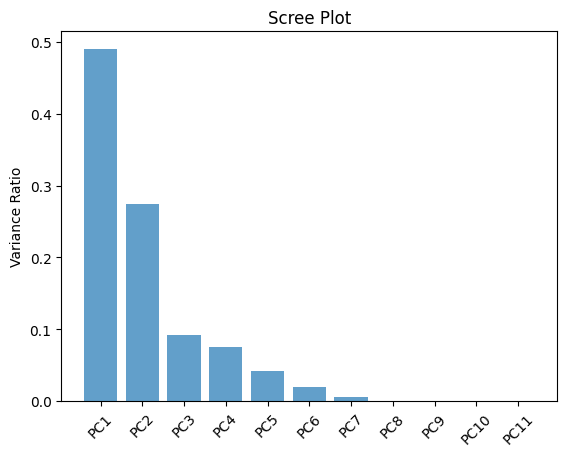

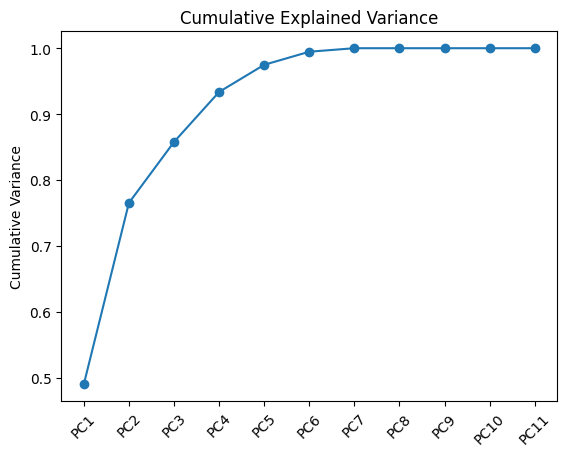

In [ ]:
# 6) Visualize variance
plt.figure()
plt.bar(evr_df['PC'], evr_df['Explained Variance Ratio'], alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.show()

plt.figure()
plt.plot(evr_df['PC'], evr_df['Cumulative VAR'], marker='o')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Explained Variance')
plt.show()

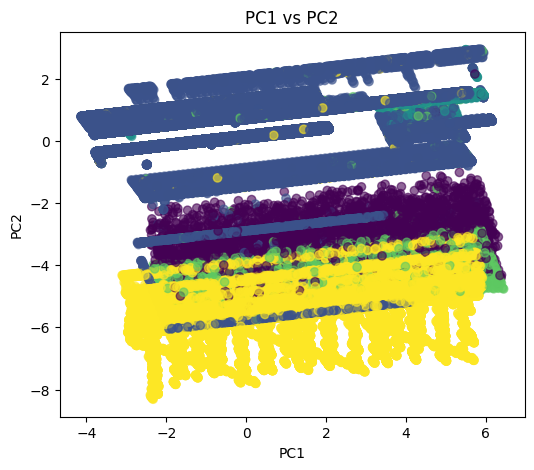

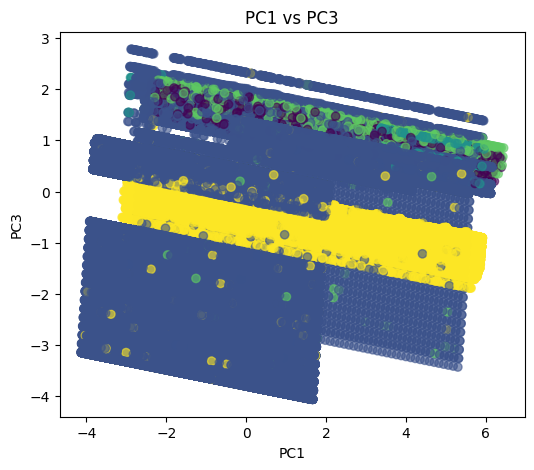

In [ ]:
# 7) Scatter PC1 vs PC2 & PC1 vs PC3
for i,j in [(0,1), (0,2)]:
    plt.figure(figsize=(6,5))
    plt.scatter(
        X_pca_full[:,i], X_pca_full[:,j],
        c=y, alpha=0.6
    )
    plt.xlabel(f'PC{i+1}'); plt.ylabel(f'PC{j+1}')
    plt.title(f'PC{i+1} vs PC{j+1}')
    plt.show()

In [ ]:
# 8) Choose n_components (e.g. enough for 90% variance)
cum_var = evr_df['Cumulative VAR']
n_comp  = cum_var.searchsorted(0.90) + 1
print(f"→ Retaining {n_comp} components to capture ≥90% variance")

→ Retaining 4 components to capture ≥90% variance


In [ ]:
cum_var

,Cumulative VAR
0,0.490292
1,0.765317
2,0.857767
3,0.933642
4,0.974821
5,0.994677
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [ ]:
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)

# 9) Train‐test split on PCs
X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# 10) Build & train a 5-class MLP
num_classes = len(np.unique(y))
model = keras.Sequential([
    keras.layers.Input(shape=(n_comp,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

es_cb = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    restore_best_weights=True,
    patience=5,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[es_cb],
    verbose=2
)

# 11) Evaluate & report
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation accuracy: {val_acc:.4f}\n")

y_pred = np.argmax(model.predict(X_val), axis=1)
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Epoch 1/50
6753/6753 - 32s - 5ms/step - accuracy: 0.9829 - loss: 0.0962 - val_accuracy: 0.9860 - val_loss: 0.0817
Epoch 2/50
6753/6753 - 34s - 5ms/step - accuracy: 0.9855 - loss: 0.0842 - val_accuracy: 0.9860 - val_loss: 0.0816
Epoch 3/50
6753/6753 - 40s - 6ms/step - accuracy: 0.9857 - loss: 0.0829 - val_accuracy: 0.9861 - val_loss: 0.0811
Epoch 4/50
6753/6753 - 31s - 5ms/step - accuracy: 0.9858 - loss: 0.0822 - val_accuracy: 0.9860 - val_loss: 0.0810
Epoch 5/50
6753/6753 - 38s - 6ms/step - accuracy: 0.9859 - loss: 0.0819 - val_accuracy: 0.9858 - val_loss: 0.0812
Epoch 6/50
6753/6753 - 43s - 6ms/step - accuracy: 0.9859 - loss: 0.0816 - val_accuracy: 0.9861 - val_loss: 0.0806
Epoch 7/50
6753/6753 - 30s - 4ms/step - accuracy: 0.9859 - loss: 0.0816 - val_accuracy: 0.9862 - val_loss: 0.0805
Epoch 8/50
6753/6753 - 30s - 4ms/step - accuracy: 0.9859 - loss: 0.0815 - val_accuracy: 0.9861 - val_loss: 0.0809
Epoch 9/50
6753/6753 - 41s - 6ms/step - accuracy: 0.9859 - loss: 0.0815 - val_accuracy: 

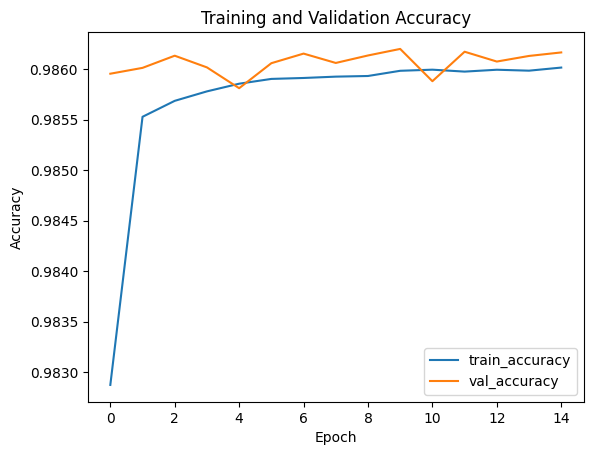

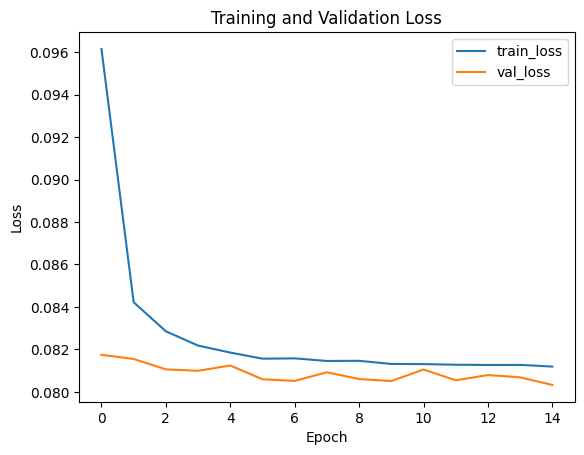

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y_enc = df['class_enc'].values

# 3) Now you can split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42
)

num_classes = len(np.unique(y_enc))

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=256
)

Epoch 1/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9697 - loss: 0.1563 - val_accuracy: 0.9820 - val_loss: 0.0927
Epoch 2/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9810 - loss: 0.0984 - val_accuracy: 0.9778 - val_loss: 0.1000
Epoch 3/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9824 - loss: 0.0933 - val_accuracy: 0.9782 - val_loss: 0.1074
Epoch 4/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9829 - loss: 0.0917 - val_accuracy: 0.9730 - val_loss: 0.1420
Epoch 5/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9828 - loss: 0.0923 - val_accuracy: 0.9835 - val_loss: 0.0978
Epoch 6/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9835 - loss: 0.0901 - val_accuracy: 0.9835 - val_loss: 0.0880
Epoch 7/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9828 - loss: 0.0923 - val_accuracy: 0.9838 - val_loss: 0.0867
Epoch 8/30
6753/6753 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9838 - loss: 0

In [ ]:
df

,FROM_NODE,TO_NODE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FLOW_DURATION,FLAG_R,PKT_TYPE_enc
0,21.0,23.0,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,49.021920,0,3
1,23.0,24.0,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,49.030211,0,3
2,23.0,22.0,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,49.030176,0,0
3,23.0,21.0,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,49.030040,0,0
4,23.0,21.0,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,49.031810,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,55.0,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,49.010549,0,0
2160664,23.0,22.0,55.0,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,49.021041,0,0
2160665,21.0,23.0,1540.0,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,49.013418,0,3
2160666,5.0,21.0,1540.0,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,49.027339,0,3


In [ ]:
df = pd.concat([df, df1['PKT_CLASS_enc']], axis=1)
df

,FROM_NODE,TO_NODE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FLOW_DURATION,FLAG_R,PKT_TYPE_enc,PKT_CLASS_enc
0,21.0,23.0,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,49.021920,0,3,1
1,23.0,24.0,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,49.030211,0,3,1
2,23.0,22.0,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,49.030176,0,0,4
3,23.0,21.0,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,49.030040,0,0,1
4,23.0,21.0,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,49.031810,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,55.0,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,49.010549,0,0,1
2160664,23.0,22.0,55.0,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,49.021041,0,0,1
2160665,21.0,23.0,1540.0,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,49.013418,0,3,1
2160666,5.0,21.0,1540.0,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,49.027339,0,3,1


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['PKT_CLASS_enc'])
y_enc = df['PKT_CLASS_enc'].values

# 3) Now you can split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42
)

num_classes = len(np.unique(y_enc))

model2 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

es_cb2 = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    restore_best_weights=True,
    patience=5,
    verbose=1
)

history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[es_cb2],
    verbose=2
)

# Evaluate & report
val_loss, val_acc = model2.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation accuracy: {val_acc:.4f}\n")

y_pred = np.argmax(model2.predict(X_val), axis=1)
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Epoch 1/50
6753/6753 - 35s - 5ms/step - accuracy: 0.9781 - loss: 0.1205 - val_accuracy: 0.9820 - val_loss: 0.0941
Epoch 2/50
6753/6753 - 41s - 6ms/step - accuracy: 0.9813 - loss: 0.0971 - val_accuracy: 0.9852 - val_loss: 0.0918
Epoch 3/50
6753/6753 - 41s - 6ms/step - accuracy: 0.9825 - loss: 0.0925 - val_accuracy: 0.9853 - val_loss: 0.0873
Epoch 4/50
6753/6753 - 38s - 6ms/step - accuracy: 0.9831 - loss: 0.0907 - val_accuracy: 0.9793 - val_loss: 0.4795
Epoch 5/50
6753/6753 - 42s - 6ms/step - accuracy: 0.9831 - loss: 0.0908 - val_accuracy: 0.9853 - val_loss: 0.1127
Epoch 6/50
6753/6753 - 31s - 5ms/step - accuracy: 0.9837 - loss: 0.0891 - val_accuracy: 0.9851 - val_loss: 0.0915
Epoch 7/50
6753/6753 - 42s - 6ms/step - accuracy: 0.9839 - loss: 0.0888 - val_accuracy: 0.9832 - val_loss: 0.1166
Epoch 8/50
6753/6753 - 43s - 6ms/step - accuracy: 0.9840 - loss: 0.0890 - val_accuracy: 0.9843 - val_loss: 0.0859
Epoch 9/50
6753/6753 - 34s - 5ms/step - accuracy: 0.9841 - loss: 0.0884 - val_accuracy: 

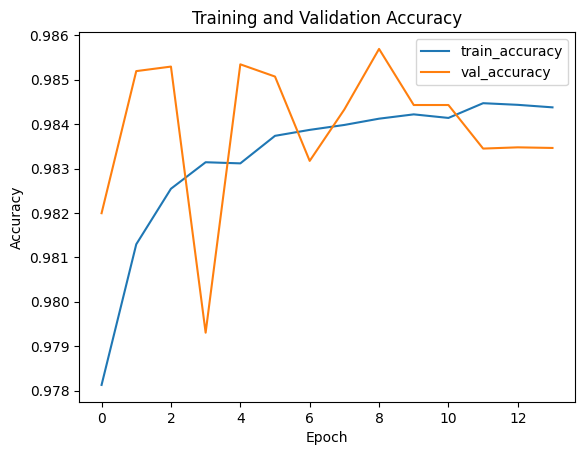

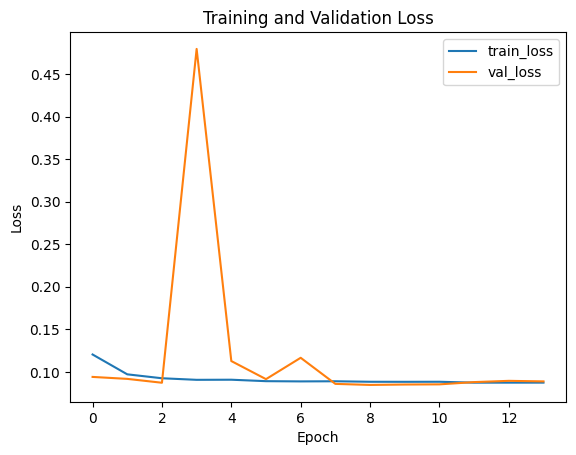

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# After training, `model` already has the weights from the best epoch.
# You can re-evaluate or re-predict with it:
best_loss, best_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Best val accuracy: {best_acc:.4f}\nBest val loss: {best_loss:.4f}")

Best val accuracy: 0.9793
Best val loss: 0.1138


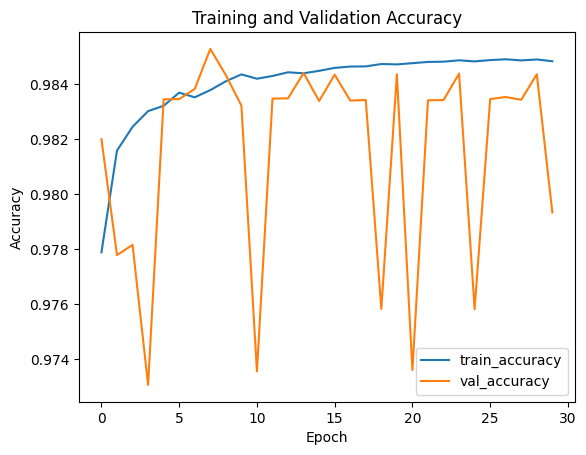

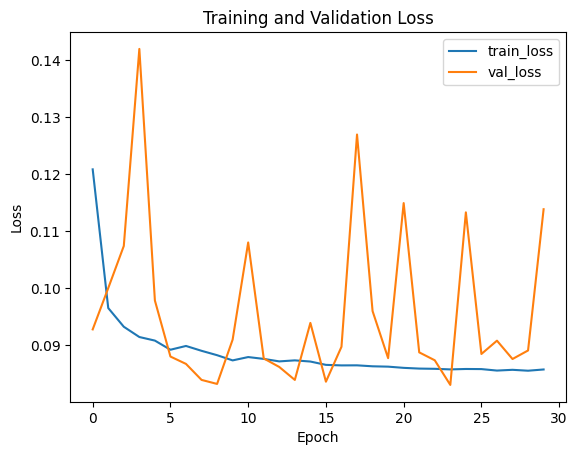

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# find index of best val_accuracy
val_accs = history.history['val_accuracy']
best_epoch = val_accs.index(max(val_accs)) + 1   # +1 for human‐readable epoch
best_val_acc = val_accs[best_epoch-1]
best_train_acc = history.history['accuracy'][best_epoch-1]

print(f"Best epoch: {best_epoch}")
print(f"Train acc: {best_train_acc:.4f}")
print(f"Val   acc: {best_val_acc:.4f}")

Best epoch: 8
Train acc: 0.9838
Val   acc: 0.9853
